In [29]:
%matplotlib inline
from matplotlib import pyplot
import geopandas as gpd
import pandas as pd
import numpy as np

from weavingspace import TileUnit
from weavingspace import Tiling

In [30]:
dissolved_anthromes_with_oceans_gdf = gpd.read_file("NACIS-2022/anthromes.gpkg", layer='anthromes', driver="GPKG")
dissolved_anthromes_with_oceans_gdf

,dissolved_id,1800AD,1900AD,2017AD,geometry
0,0,11,11,11,"MULTIPOLYGON (((10956991.270 4637292.644, 1095..."
1,1,11,23,11,"POLYGON ((-465746.168 6309381.175, -471477.536..."
2,2,12,11,11,"MULTIPOLYGON (((11864618.365 4311334.857, 1186..."
3,3,12,12,11,"MULTIPOLYGON (((11756787.375 5269523.964, 1176..."
4,4,12,12,12,"MULTIPOLYGON (((14603364.466 -394422.814, 1460..."
...,...,...,...,...,...
1370,1370,63,63,43,"MULTIPOLYGON (((12936070.376 -1482822.556, 129..."
1371,1371,63,63,54,"MULTIPOLYGON (((11314195.005 7682244.987, 1130..."
1372,1372,63,63,62,"MULTIPOLYGON (((7591010.270 4501518.274, 75938..."
1373,1373,63,63,63,"MULTIPOLYGON (((12129159.917 7443285.135, 1212..."


In [31]:
anthromes = dissolved_anthromes_with_oceans_gdf.explode(
  index_parts = False, ignore_index = True)
anthromes

,dissolved_id,1800AD,1900AD,2017AD,geometry
0,0,11,11,11,"POLYGON ((10956991.270 4637292.644, 10951661.5..."
1,0,11,11,11,"POLYGON ((10822422.616 3911051.716, 10817483.1..."
2,0,11,11,11,"POLYGON ((10756947.432 3908140.236, 10751913.3..."
3,0,11,11,11,"POLYGON ((10707214.123 3938881.227, 10702275.5..."
4,0,11,11,11,"POLYGON ((10543105.144 4021090.177, 10548047.0..."
...,...,...,...,...,...
256573,1374,0,0,0,"POLYGON ((-10846850.509 7446007.561, -10836432..."
256574,1374,0,0,0,"POLYGON ((-12070264.690 6558267.829, -12080887..."
256575,1374,0,0,0,"POLYGON ((-10917886.642 7432852.626, -10918752..."
256576,1374,0,0,0,"POLYGON ((-10877585.147 7477808.463, -10888053..."


In [32]:
anthromes.sindex
anthromes.has_sindex

True

In [33]:
anthromes.head()

,dissolved_id,1800AD,1900AD,2017AD,geometry
0,0,11,11,11,"POLYGON ((10956991.270 4637292.644, 10951661.5..."
1,0,11,11,11,"POLYGON ((10822422.616 3911051.716, 10817483.1..."
2,0,11,11,11,"POLYGON ((10756947.432 3908140.236, 10751913.3..."
3,0,11,11,11,"POLYGON ((10707214.123 3938881.227, 10702275.5..."
4,0,11,11,11,"POLYGON ((10543105.144 4021090.177, 10548047.0..."


In [34]:
unit = TileUnit(tiling_type = "hex-colouring", 
                #  Note these alternatives:
                #  tiling_type = "hex-dissection", 
                #  tiling_type = "hex-dissection", dissection_offset = 0,
                n = 3, crs = anthromes.crs, 
                spacing = 500000).transform_rotate(15)

<AxesSubplot:>

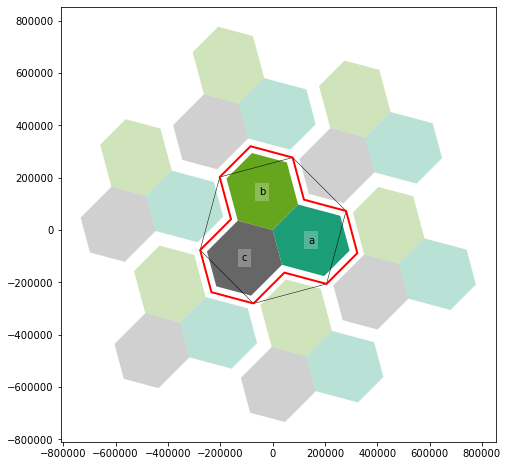

In [35]:
unit = unit.inset_tile(25000)
unit.plot(r = 1)

In [36]:
tiling = Tiling(unit, anthromes, id_var = "dissolved_id")

In [ ]:
Error error error

In [38]:
import dask_geopandas
dt = dask_geopandas.from_geopandas(tiling.tiles, npartitions = 4)
at = dask_geopandas.from_geopandas(anthromes, npartitions = 4)
dt.sjoin(at).compute()

In [ ]:
# tiling.region.buffer(tiling.tile_unit.spacing).unary_union

In [ ]:
map = tiling.get_tiled_map(
  prioritise_tiles = True, ragged_edges = True, debug = True)

In [ ]:
fig = map.render()

In [ ]:
map.to_file('NACIS-2022/anthromes-tiled-500-20.gpkg')

In [ ]:
this will cause an error

In [ ]:
map.variables = dict(zip(list("abc"),
                        ("1800AD", "1900AD", "2017AD")))
map.colourmaps = dict(zip(map.variables.values(), 
                         ("Spectral", "Spectral", "Spectral")))

fig = map.render(legend = False, scheme = "quantiles") # quantiles for interest

In [ ]:
map.dpi = 600  # don't ask me what makes sense for DPI
map.figsize = (10, 7)

fig = map.render(legend = False, scheme = "quantiles")

In [ ]:
fig.savefig("NACIS-2022/output/another-map.svg")